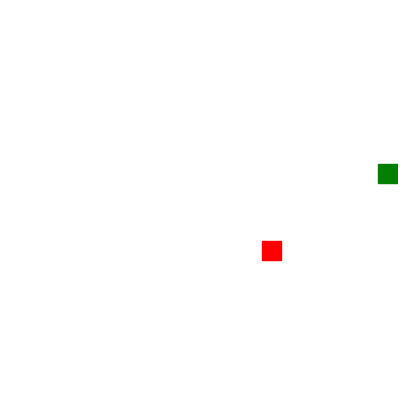

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, clear_output

class SnakeEnv:
    def __init__(self, grid_size=(20, 20)):
        self.grid_size = grid_size
        self.reset()

    def reset(self):
        self.snake = [(np.random.randint(2, self.grid_size[0] - 2), np.random.randint(2, self.grid_size[1] - 2))]
        self.food = None
        self.direction = (0, 1)  # Moving right initially
        self.score = 0
        self._place_food()
        return self._get_observation()

    def _place_food(self):
        while self.food is None or self.food in self.snake:
            self.food = (np.random.randint(self.grid_size[0]), np.random.randint(self.grid_size[1]))

    def step(self, action):
        # Define action as a direction change: 0=left, 1=right, 2=up, 3=down
        direction_changes = {0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1)}
        self.direction = direction_changes[action]
        new_head = (self.snake[0][0] + self.direction[0], self.snake[0][1] + self.direction[1])

        # Check for game over conditions
        if new_head in self.snake or new_head[0] < 0 or new_head[1] < 0 or new_head[0] >= self.grid_size[0] or new_head[1] >= self.grid_size[1]:
            return self._get_observation(), -1, True, {}  # Game over

        self.snake.insert(0, new_head)

        # Check for food consumption
        if new_head == self.food:
            self.score += 1
            self._place_food()
        else:
            self.snake.pop()

        return self._get_observation(), 1 if new_head == self.food else 0, False, {}

    def _get_observation(self):
        # get the position of the unit y vector snake ref frame
        j_hat = (self.direction[0], -1 * self.direction[1])
        i_hat = (-1 * self.direction[1], -1 * self.direction[0])
# #         print(self.direction, self.snake[0], i_hat, j_hat)
#         print("snake head: ", self.snake[0])
#         print("snake dir: ", self.direction)
        obs = []
        for i in range(-5, 6):
            if i != 0:
                pos = ( self.snake[0][0] + i * i_hat[0], self.snake[0][1] + i * i_hat[1])
                if 0 <= pos[0] < self.grid_size[0] and 0 <= pos[1] < self.grid_size[1]:
                    if pos == self.food:
                        obs.append(1)
                    elif pos in self.snake:
                        obs.append(-1)
                    else:
                        obs.append(0)
                else:
                    obs.append(-1)
        for i in range(-1, 2):
            pos = ( self.snake[0][0] + j_hat[0] + i * i_hat[0], self.snake[0][1] + j_hat[1] + i * i_hat[1])
            if 0 <= pos[0] < self.grid_size[0] and 0 <= pos[1] < self.grid_size[1]:
                if pos == self.food:
                    obs.append(1)
                elif pos in self.snake:
                    obs.append(-1)
                else:
                    obs.append(0)
            else:
                obs.append(-1)
        return np.array(obs)

    def render(self):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_xlim(0, self.grid_size[0])
        ax.set_ylim(0, self.grid_size[1])
#         ax.set_xticks(range(self.grid_size[0]))
#         ax.set_yticks(range(self.grid_size[1]))
        ax.grid(False)
        plt.axis('off')
        # Plot snake
        for part in self.snake:
            ax.add_patch(plt.Rectangle(part, 1, 1, color="green"))
        # Plot food
        ax.add_patch(plt.Rectangle(self.food, 1, 1, color="red"))
        display(fig)
        clear_output(wait=True)
        plt.close()

env = SnakeEnv()
obs = env.reset()
done = False

while not done:
    action = np.random.randint(0, 4)
    obs, reward, done, info = env.step(action)

    env.render()

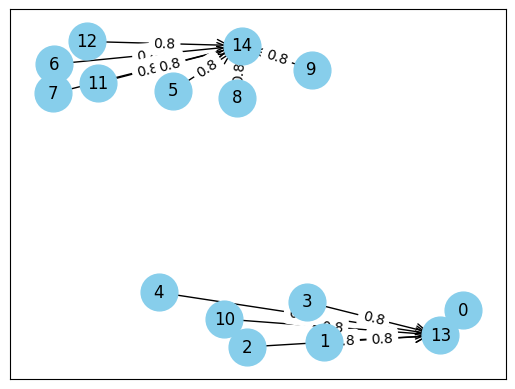

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

class Link:
    def __init__(self, innovationId, fro, to, weight, enabled: bool = True) -> None:
        self.innovationId = innovationId
        self.fro = fro
        self.to = to
        self.weight = weight
        self.enabled = enabled
        
class Neuron:
    def __init__(self, neuronId, typ, dirc, pos) -> None:
        self.neuronId = neuronId
        self.typ = typ
        self.dirc = dirc
        self.pos = pos

class Genome:
    def __init__(self, speciesId, genomeId) -> None:
        self.speciesId = speciesId
        self.genomeId = genomeId
        self.links = []
        self.neurons = []
        
    def render_genome(self):
        # Create directed graph
        G = nx.DiGraph()

        # Add neurons as nodes, store the position in the pos dict
#         pos = {}
        for neuron in self.neurons:
            G.add_node(neuron.neuronId, typ=neuron.typ, dirc=neuron.dirc)
#             if neuron.pos is not None:
#                 pos[neuron.neuronId] = neuron.pos
#             else:
#                 # Assign a default position if none is specified
#                 pos[neuron.neuronId] = (0, 0)

        # Add links as edges
        for link in self.links:
            if link.enabled:
                G.add_edge(link.fro, link.to, weight=abs(link.weight))
                
#         pos = nx.spring_layout(G)
        pos = nx.spring_layout(G, iterations=50)

        # Draw the nodes
        nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

        # Draw the edges
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        # Draw the labels
        node_labels = {node[0]: node[0] for node in G.nodes(data=True)}
        nx.draw_networkx_labels(G, pos, labels=node_labels)

        # Show plot
        plt.show()

#     def render_genome(self):
#         # Create directed graph
#         G = nx.DiGraph()

#         # Add neurons as nodes
#         for neuron in self.neurons:
#             G.add_node(neuron.neuronId, typ=neuron.typ, dirc=neuron.dirc)

#         # Add links as edges
#         for link in self.links:
#             if link.enabled:
#                 G.add_edge(link.fro, link.to, weight=link.weight)

#         # Use a spring layout for automatic positioning of nodes
#         pos = nx.spring_layout(G)

#         # Draw the nodes
#         nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

#         # Draw the edges
#         edge_labels = nx.get_edge_attributes(G, 'weight')
#         nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)
#         nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

#         # Draw the labels
#         node_labels = {node: str(node) for node in G.nodes()}
#         nx.draw_networkx_labels(G, pos, labels=node_labels)

#         # Set the plot size
#         plt.figure(figsize=(12, 8))

#         # Show plot
#         plt.show()

    def predict(self, obs) -> np.array:
        
        
g1 = Genome(0, 0)

# Adding Neurons

for i in range(-5, 6):
    if i != 0:
        g1.neurons.append(Neuron(len(g1.neurons), "in", None, (i, 0)))
        
for i in range(-1, 2):
    g1.neurons.append(Neuron(len(g1.neurons), "in", None, (i, 1)))
g1.neurons.append(Neuron(len(g1.neurons), "out", "left", None))
g1.neurons.append(Neuron(len(g1.neurons), "out", "right", None))

# Adding links

for i in range(5):
    g1.links.append(Link(len(g1.links), i, len(g1.neurons) - 2, 0.8))
for i in range(5):
    g1.links.append(Link(len(g1.links), 5 + i, len(g1.neurons) - 1, 0.8))
g1.links.append(Link(len(g1.links), 10, len(g1.neurons) - 2, -0.8))
g1.links.append(Link(len(g1.links), 11, len(g1.neurons) - 1, -0.8))
g1.links.append(Link(len(g1.links), 12, len(g1.neurons) - 1, -0.8))

g1.render_genome()